In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.backends.backend_pdf import PdfPages
import scipy.cluster.hierarchy as spc

In [2]:
df=pd.read_csv('Stats_task2.csv')

In [3]:
#Removing extra columns
df =  df.iloc[:,0:16]
df = df.drop('MS1_count',axis = 1)
df = df.drop('MS2_triggered',axis = 1)
df = df.drop('Ion Type',axis = 1)

In [4]:
df

,ID,mz,RT_median,Intensity_11801 600uE CLDC BR1 IS IDA-1,Intensity_11801 600uE CLDC BR2 IS IDA-1,Intensity_11801 LDC 25-HR BR1 IS IDA-1,Intensity_11801 LDC 25-HR BR2 IS IDA-1,Intensity_11801 LDC 31-HR BR1 IS IDA-1,Intensity_11801 LDC 31-HR BR2 IS IDA-1,Intensity_11801 LDC 37-HR BR1 IS IDA-1,Intensity_11801 LDC 37-HR BR2 IS IDA-1,Intensity_11801 LDC 43-HR BR1 IS IDA-1,Intensity_11801 LDC 43-HR BR2 IS IDA-1
0,1,380.916,0.16,931.17,0.00,0.0,0.0,0.00,0.0,819.61,774.15,0.00,771.39
1,2,244.968,0.18,2925.11,1964.07,0.0,0.0,0.00,0.0,2677.71,2370.63,0.00,0.00
2,3,384.912,0.18,775.42,772.65,0.0,0.0,0.00,0.0,562.19,0.00,0.00,678.49
3,4,242.969,0.19,4442.34,2794.34,0.0,0.0,0.00,0.0,3718.51,3660.23,0.00,3348.82
4,5,241.976,0.21,0.00,382.06,0.0,0.0,0.00,0.0,197.62,443.55,0.00,430.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,2632,244.968,24.53,4690.34,5378.54,0.0,0.0,3042.17,0.0,0.00,2797.01,3713.84,0.00
2632,2633,242.969,24.54,7128.85,8237.81,0.0,0.0,4778.93,0.0,5507.32,4151.96,0.00,5049.63
2633,2634,340.974,24.55,3625.66,0.00,0.0,0.0,633.37,0.0,1842.82,2069.59,2752.49,258.05
2634,2635,240.972,24.56,13734.50,12818.58,0.0,0.0,5922.76,0.0,7523.57,6936.35,9466.04,9308.27


In [5]:
df2 = df[['Intensity_11801 600uE CLDC BR1 IS IDA-1',
       'Intensity_11801 600uE CLDC BR2 IS IDA-1',
       'Intensity_11801 LDC 25-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 25-HR BR2 IS IDA-1',
       'Intensity_11801 LDC 31-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 31-HR BR2 IS IDA-1',
       'Intensity_11801 LDC 37-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 37-HR BR2 IS IDA-1',
       'Intensity_11801 LDC 43-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 43-HR BR2 IS IDA-1']]

In [6]:
df2 = df2.transpose()
df2

,0,1,2,3,4,5,6,7,8,9,...,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635
Intensity_11801 600uE CLDC BR1 IS IDA-1,931.17,2925.11,775.42,4442.34,0.00,5981.98,1885.12,0.00,13498.31,2453.77,...,0.00,2211.55,0.00,0.00,7542.05,4690.34,7128.85,3625.66,13734.50,0.00
Intensity_11801 600uE CLDC BR2 IS IDA-1,0.00,1964.07,772.65,2794.34,382.06,5059.50,1188.67,0.00,12262.43,2206.99,...,1739.01,2054.97,7614.06,0.00,7933.93,5378.54,8237.81,0.00,12818.58,733.88
Intensity_11801 LDC 25-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2086.35,0.00,164.85,4753.15,0.00,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 25-HR BR2 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3262.26,0.00,...,0.00,3865.35,5069.21,2136.95,0.00,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 31-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2261.54,467.48,...,1617.66,329.44,4543.65,0.00,5218.75,3042.17,4778.93,633.37,5922.76,0.00
Intensity_11801 LDC 31-HR BR2 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,316.80,325.13,2125.44,0.00,...,192.69,0.00,0.00,0.00,5480.97,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 37-HR BR1 IS IDA-1,819.61,2677.71,562.19,3718.51,197.62,0.00,3003.13,1966.53,17272.05,3623.52,...,0.00,730.67,4409.80,0.00,5110.31,0.00,5507.32,1842.82,7523.57,756.05
Intensity_11801 LDC 37-HR BR2 IS IDA-1,774.15,2370.63,0.00,3660.23,443.55,5776.15,0.00,2032.08,0.00,0.00,...,0.00,0.00,0.00,240.78,3814.77,2797.01,4151.96,2069.59,6936.35,747.74
Intensity_11801 LDC 43-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,2333.64,0.00,0.00,0.00,0.00,...,3516.09,0.00,6583.76,2028.11,7347.51,3713.84,0.00,2752.49,9466.04,757.43
Intensity_11801 LDC 43-HR BR2 IS IDA-1,771.39,0.00,678.49,3348.82,430.37,5357.52,0.00,1628.27,11688.03,2740.67,...,321.16,0.00,0.00,0.00,5593.80,0.00,5049.63,258.05,9308.27,814.20


In [7]:
df3 = df.transpose()

In [8]:
#count number of zeroes in each column
flag=0
arr=[]
for i in range(0,2635):
    cnt=0
    for j in range(0,10):
        if df2.iloc[j][i]==0:
            cnt = cnt+1
    if cnt>5:
        arr.append(i)
        flag = 1

In [9]:
len(arr)

516

In [10]:
df3.drop(df3.columns[arr], axis=1,inplace=True)

In [11]:
df3

,3,5,8,9,11,12,15,16,17,18,...,2625,2626,2627,2628,2630,2631,2632,2633,2634,2635
ID,4.000,6.000,9.000,10.000,12.000,13.000,16.00,17.000,18.000,19.000,...,2626.000,2627.000,2628.000,2629.000,2631.000,2632.000,2633.000,2634.000,2635.000,2636.000
mz,242.969,240.971,201.028,202.029,301.029,343.041,589.05,366.038,449.038,433.023,...,299.009,284.033,533.994,332.984,398.961,244.968,242.969,340.974,240.972,384.913
RT_median,0.190,0.410,0.820,0.820,0.820,0.830,0.85,0.860,0.870,0.880,...,24.220,24.230,24.240,24.260,24.510,24.530,24.540,24.550,24.560,24.560
Intensity_11801 600uE CLDC BR1 IS IDA-1,4442.340,5981.980,13498.310,2453.770,4031.200,6784.380,1284.72,0.000,4612.400,1694.850,...,0.000,0.000,2211.550,0.000,7542.050,4690.340,7128.850,3625.660,13734.500,0.000
Intensity_11801 600uE CLDC BR2 IS IDA-1,2794.340,5059.500,12262.430,2206.990,4089.980,5053.630,1272.73,2141.590,3577.450,2423.310,...,0.000,1739.010,2054.970,7614.060,7933.930,5378.540,8237.810,0.000,12818.580,733.880
Intensity_11801 LDC 25-HR BR1 IS IDA-1,0.000,0.000,0.000,0.000,0.000,264.060,0.00,0.000,0.000,1242.510,...,0.000,2086.350,0.000,164.850,0.000,0.000,0.000,0.000,0.000,0.000
Intensity_11801 LDC 25-HR BR2 IS IDA-1,0.000,0.000,3262.260,0.000,891.480,0.000,0.00,526.620,0.000,0.000,...,5662.830,0.000,3865.350,5069.210,0.000,0.000,0.000,0.000,0.000,0.000
Intensity_11801 LDC 31-HR BR1 IS IDA-1,0.000,0.000,2261.540,467.480,506.960,998.690,681.75,0.000,0.000,0.000,...,0.000,1617.660,329.440,4543.650,5218.750,3042.170,4778.930,633.370,5922.760,0.000
Intensity_11801 LDC 31-HR BR2 IS IDA-1,0.000,0.000,2125.440,0.000,445.730,708.490,0.00,0.000,0.000,0.000,...,6063.010,192.690,0.000,0.000,5480.970,0.000,0.000,0.000,0.000,0.000
Intensity_11801 LDC 37-HR BR1 IS IDA-1,3718.510,0.000,17272.050,3623.520,3965.110,8227.620,3477.34,2500.800,4394.090,0.000,...,6326.740,0.000,730.670,4409.800,5110.310,0.000,5507.320,1842.820,7523.570,756.050


In [12]:
#replace missing value with median intensity
for i in range(0,2120):
    medianMinPA = (df3.iloc[3:13,i].loc[df3.iloc[3:13,i] != 0.00]).median()
    df3.iloc[3:13,i]=df3.iloc[3:13,i].replace(0.00,medianMinPA)

In [13]:
df3

,3,5,8,9,11,12,15,16,17,18,...,2625,2626,2627,2628,2630,2631,2632,2633,2634,2635
ID,4.000,6.000,9.000,10.000,12.000,13.000,16.00,17.000,18.000,19.000,...,2626.000,2627.000,2628.000,2629.000,2631.000,2632.000,2633.000,2634.000,2635.000,2636.000
mz,242.969,240.971,201.028,202.029,301.029,343.041,589.05,366.038,449.038,433.023,...,299.009,284.033,533.994,332.984,398.961,244.968,242.969,340.974,240.972,384.913
RT_median,0.190,0.410,0.820,0.820,0.820,0.830,0.85,0.860,0.870,0.880,...,24.220,24.230,24.240,24.260,24.510,24.530,24.540,24.550,24.560,24.560
Intensity_11801 600uE CLDC BR1 IS IDA-1,4442.340,5981.980,13498.310,2453.770,4031.200,6784.380,1284.72,2330.620,4612.400,1694.850,...,6326.740,1678.335,2211.550,4806.430,7542.050,4690.340,7128.850,3625.660,13734.500,756.050
Intensity_11801 600uE CLDC BR2 IS IDA-1,2794.340,5059.500,12262.430,2206.990,4089.980,5053.630,1272.73,2141.590,3577.450,2423.310,...,6326.740,1739.010,2054.970,7614.060,7933.930,5378.540,8237.810,1956.205,12818.580,733.880
Intensity_11801 LDC 25-HR BR1 IS IDA-1,3660.230,5357.520,11688.030,2453.770,3399.380,264.060,1284.72,2330.620,4580.980,1242.510,...,6326.740,2086.350,2054.970,164.850,5537.385,3713.840,5278.475,1956.205,9308.270,756.050
Intensity_11801 LDC 25-HR BR2 IS IDA-1,3660.230,5357.520,3262.260,2453.770,891.480,5431.425,1284.72,526.620,4580.980,1822.640,...,5662.830,1678.335,3865.350,5069.210,5537.385,3713.840,5278.475,1956.205,9308.270,756.050
Intensity_11801 LDC 31-HR BR1 IS IDA-1,3660.230,5357.520,2261.540,467.480,506.960,998.690,681.75,2330.620,4580.980,1822.640,...,6326.740,1617.660,329.440,4543.650,5218.750,3042.170,4778.930,633.370,5922.760,756.050
Intensity_11801 LDC 31-HR BR2 IS IDA-1,3660.230,5357.520,2125.440,2453.770,445.730,708.490,1284.72,2330.620,4580.980,1822.640,...,6063.010,192.690,2054.970,4806.430,5480.970,3713.840,5278.475,1956.205,9308.270,756.050
Intensity_11801 LDC 37-HR BR1 IS IDA-1,3718.510,5357.520,17272.050,3623.520,3965.110,8227.620,3477.34,2500.800,4394.090,1822.640,...,6326.740,1678.335,730.670,4409.800,5110.310,3713.840,5507.320,1842.820,7523.570,756.050


In [14]:
#renaming columns to consecutive index
j=0
for i in range(0,2120):
    df3.columns.values[i] = j;
    j = j+1

In [15]:
for i in range(0,2120):
    df3.iloc[3:13,i:i+1] = np.log(df3.iloc[3:13,i:i+1])

In [35]:
df3.T

,ID,mz,RT_median,Intensity_11801 600uE CLDC BR1 IS IDA-1,Intensity_11801 600uE CLDC BR2 IS IDA-1,Intensity_11801 LDC 25-HR BR1 IS IDA-1,Intensity_11801 LDC 25-HR BR2 IS IDA-1,Intensity_11801 LDC 31-HR BR1 IS IDA-1,Intensity_11801 LDC 31-HR BR2 IS IDA-1,Intensity_11801 LDC 37-HR BR1 IS IDA-1,Intensity_11801 LDC 37-HR BR2 IS IDA-1,Intensity_11801 LDC 43-HR BR1 IS IDA-1,Intensity_11801 LDC 43-HR BR2 IS IDA-1
0,4.0,242.969,0.19,8.398937,7.935351,8.205281,8.205281,8.205281,8.205281,8.221078,8.205281,8.205281,8.116363
1,6.0,240.971,0.41,8.696507,8.529023,8.586256,8.586256,8.586256,8.586256,8.586256,8.661493,7.755185,8.586256
2,9.0,201.028,0.82,9.510320,9.414295,9.366321,8.090175,7.723801,7.661734,9.756845,9.366321,9.366321,9.366321
3,10.0,202.029,0.82,7.805381,7.699385,7.805381,7.805381,6.147357,7.805381,8.195201,7.805381,7.805381,7.915958
4,12.0,301.029,0.82,8.301819,8.316295,8.131348,6.792883,6.228432,6.099713,8.285289,8.131348,8.131348,8.131348
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2632.0,244.968,24.53,8.453260,8.590172,8.219822,8.219822,8.020326,8.219822,8.219822,7.936306,8.219822,8.219822
2116,2633.0,242.969,24.54,8.871905,9.016490,8.571393,8.571393,8.471972,8.571393,8.613833,8.331336,8.571393,8.527070
2117,2634.0,340.974,24.55,8.195792,7.578762,7.578762,7.578762,6.451055,7.578762,7.519052,7.635106,7.920261,5.553153
2118,2635.0,240.972,24.56,9.527666,9.458651,9.138659,9.138659,8.686558,9.138659,8.925796,8.844531,9.155466,9.138659


In [65]:
def isotope(*ind):
    rt_tol = 0.01 
    i = ind[0][0]
    j = ind[-1][-1]
    dframe = df3.iloc[1:13,i:j+1].T
#    print(dframe)
    for x in range(0,j-i-1): 
        for y in range(x+1,j-i):
#             print(dframe.iat[x,1])
            if (1.003-0.01<= abs(dframe.iat[x,0]-dframe.iat[y,0]) <=1.003+0.01) and (abs(dframe.iat[x,1]-dframe.iat[y,1])<rt_tol):
                print("Isotopes are m/z %d and %d" %(dframe.iat[x,0],dframe.iat[y,0]))
                

In [75]:
def corr(*ind):
    i = ind[0][0]
    j = ind[-1][-1]
#     print(i)
#     print(j)
    df_small = df3.iloc[3:13,i:j+1]
    correlation_mat = df_small.corr()
    sns.heatmap(correlation_mat, annot = True)
    plt.show()
    corelat = correlation_mat .values
    pdist = spc.distance.pdist(corelat)
    linkage = spc.linkage(pdist, method='average')
    idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')
    print(idx)
    print("Number of cluster = %d" %idx.max())

#     # Keep the indices to sort labels
#     labels_order = np.argsort(idx)

#     # Build a new dataframe with the sorted columns
#     for idx, i in enumerate(df_small.columns[labels_order]):
#         if idx == 0:
#             clustered = pd.DataFrame(df_small[i])
#         else:
#             df_to_append = pd.DataFrame(df_small[i])
#             clustered = pd.concat([clustered, df_to_append], axis=1)
    
#     plt.figure(figsize=(15,10))
#     correlations = clustered.corr()
#     sns.heatmap(round(correlations,2), annot=True);

In [53]:
df3.T

,ID,mz,RT_median,Intensity_11801 600uE CLDC BR1 IS IDA-1,Intensity_11801 600uE CLDC BR2 IS IDA-1,Intensity_11801 LDC 25-HR BR1 IS IDA-1,Intensity_11801 LDC 25-HR BR2 IS IDA-1,Intensity_11801 LDC 31-HR BR1 IS IDA-1,Intensity_11801 LDC 31-HR BR2 IS IDA-1,Intensity_11801 LDC 37-HR BR1 IS IDA-1,Intensity_11801 LDC 37-HR BR2 IS IDA-1,Intensity_11801 LDC 43-HR BR1 IS IDA-1,Intensity_11801 LDC 43-HR BR2 IS IDA-1
0,4.0,242.969,0.19,8.398937,7.935351,8.205281,8.205281,8.205281,8.205281,8.221078,8.205281,8.205281,8.116363
1,6.0,240.971,0.41,8.696507,8.529023,8.586256,8.586256,8.586256,8.586256,8.586256,8.661493,7.755185,8.586256
2,9.0,201.028,0.82,9.510320,9.414295,9.366321,8.090175,7.723801,7.661734,9.756845,9.366321,9.366321,9.366321
3,10.0,202.029,0.82,7.805381,7.699385,7.805381,7.805381,6.147357,7.805381,8.195201,7.805381,7.805381,7.915958
4,12.0,301.029,0.82,8.301819,8.316295,8.131348,6.792883,6.228432,6.099713,8.285289,8.131348,8.131348,8.131348
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2632.0,244.968,24.53,8.453260,8.590172,8.219822,8.219822,8.020326,8.219822,8.219822,7.936306,8.219822,8.219822
2116,2633.0,242.969,24.54,8.871905,9.016490,8.571393,8.571393,8.471972,8.571393,8.613833,8.331336,8.571393,8.527070
2117,2634.0,340.974,24.55,8.195792,7.578762,7.578762,7.578762,6.451055,7.578762,7.519052,7.635106,7.920261,5.553153
2118,2635.0,240.972,24.56,9.527666,9.458651,9.138659,9.138659,8.686558,9.138659,8.925796,8.844531,9.155466,9.138659


[]
[0]
[1, 2, 3]


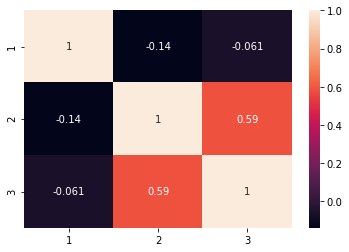

[2 1 1]
Number of cluster = 2
[4]
[5]
[6]
[7]
[8, 9]


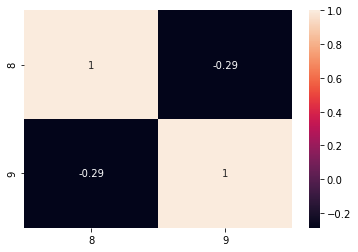

[1 2]
Number of cluster = 2
[10, 11, 12, 13, 14]


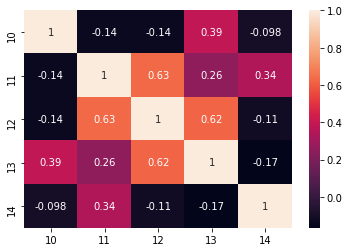

[3 1 1 2 4]
Number of cluster = 4
[15, 16, 17]


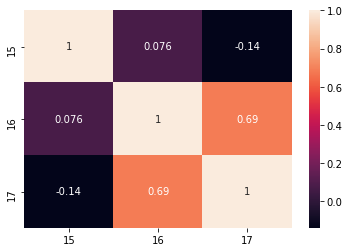

[2 1 1]
Number of cluster = 2
[18, 19]


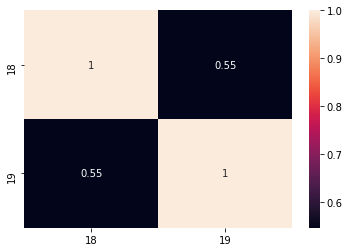

[1 2]
Number of cluster = 2
[20, 21]


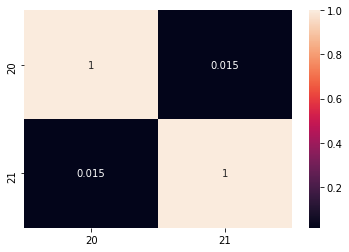

[1 2]
Number of cluster = 2
[22, 23, 24]


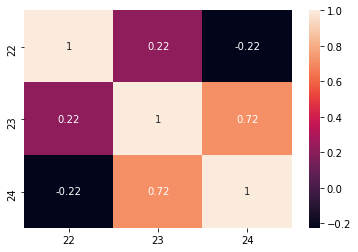

[2 1 1]
Number of cluster = 2
[25, 26]


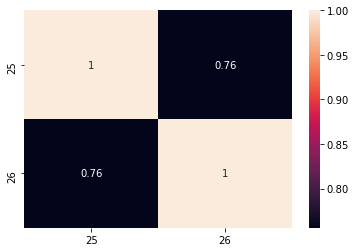

[1 2]
Number of cluster = 2
[27, 28]


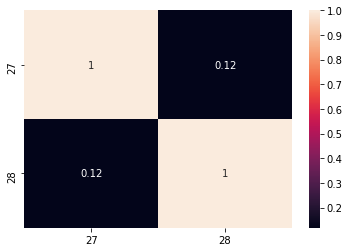

[1 2]
Number of cluster = 2
[29, 30, 31, 32, 33, 34, 35, 36, 37]


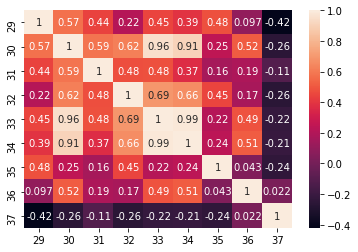

[1 1 1 1 1 1 1 1 2]
Number of cluster = 2
[38, 39, 40, 41, 42]


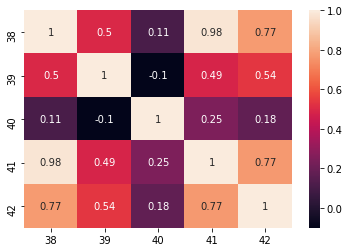

[1 2 3 1 1]
Number of cluster = 3
[43, 44, 45, 46]


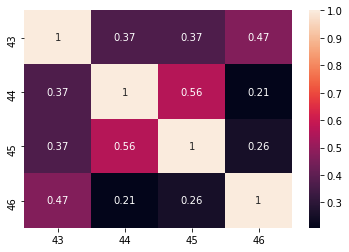

[3 1 2 4]
Number of cluster = 4
[47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


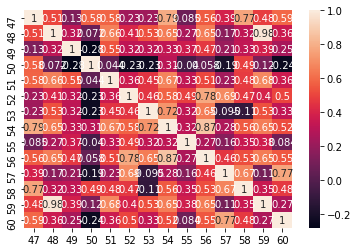

[1 4 3 5 4 2 4 4 3 4 2 1 4 2]
Number of cluster = 5
Isotopes are m/z 305 and 306
Isotopes are m/z 568 and 569
[61, 62, 63]


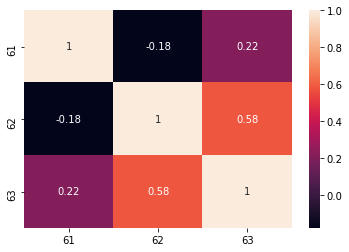

[2 1 1]
Number of cluster = 2
[64, 65, 66, 67, 68, 69]


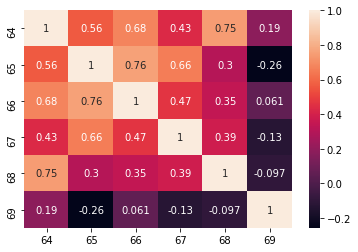

[1 1 1 1 1 2]
Number of cluster = 2
[70, 71, 72]


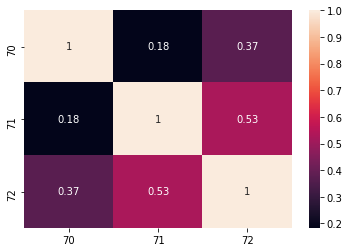

[3 1 2]
Number of cluster = 3
[73, 74, 75, 76, 77]


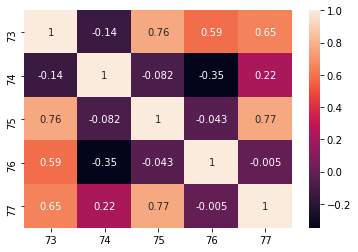

[1 3 1 2 1]
Number of cluster = 3
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87, 88]


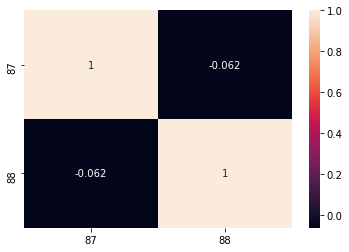

[1 2]
Number of cluster = 2
[89]
[90, 91, 92, 93, 94, 95, 96]


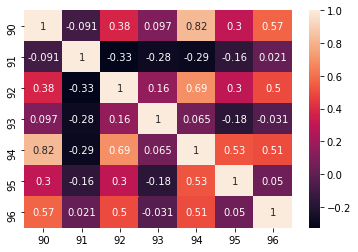

[1 3 1 2 1 1 1]
Number of cluster = 3


In [76]:
#retention time tolerance
rt_tol = 0.01 
ind = []
j=1
for i in range(0,100):
    if (df3.T.iat[j,2]-df3.T.iat[i,2])>rt_tol:
        print(ind)
        if len(ind)>1:
            corr(ind)
            isotope(ind)
        ind = []
        ind.append(df3.T.index[i])
    else:
        ind.append(df3.T.index[i])
    j=j+1